# **Why Deep Learning Became Essential**

## **1. Origin**
Neural networks were created to **mimic the human brain**, helping machines learn and think like humans.

---

## **2. Limitations of Traditional Algorithms**
Traditional models like **Linear Regression** and **Logistic Regression**:
- Performed well only with small data.  
- **Failed to improve** even when given more data.  
- Couldn’t **capture complex patterns** or scale effectively.

---

## **3. Rise of Deep Learning**
Researchers found that as **neural networks grew larger**, their **performance kept improving** with more data.  
This made them ideal for:
- **Speech recognition**  
- **Image recognition**  
- **Natural language processing (NLP)**  

---

## **4. Hardware Revolution**
The rise of **GPUs** (originally for graphics) made training large neural networks **faster and more efficient**.

---

## **5. Summary**
Deep learning succeeded because it:
- **Scales with big data**  
- **Learns complex patterns**  
- **Uses powerful hardware** to achieve state-of-the-art results

Exploring the inner workings of neurons/units and layers. In particular, this notebook will draw parallels to the models, the regression/linear model and the logistic model. Using Tensorflow we can demonstrate how these models are implemented in that framework.



##Nuerons without Activation - Regression Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

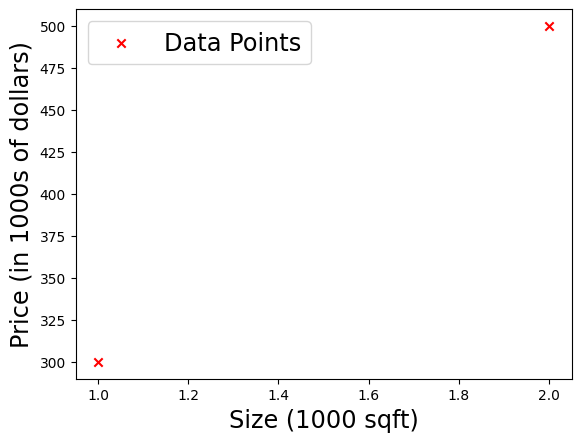

In [ ]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', label = "Data Points")
ax.legend(fontsize = 'xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize = 'xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize = 'xx-large')
plt.show()

### Regression/Linear Model


The function implemented by a neuron with linear regression:
$$ f_{\mathbf{w},b}(x^{(i)}) = \mathbf{w}\cdot x^{(i)} + b \tag{1}$$


Types of Layers in TensorFlow Keras
1. Core Layers

Basic layers used in most models:

- Dense — Fully connected layer (most common).

- Activation — Applies an activation function (ReLU, Sigmoid, etc.).

- Dropout — Prevents overfitting by randomly turning off neurons.

- Flatten — Converts multi-dimensional input to 1D.

- Reshape — Changes the shape of input tensor.

- Input — Defines input shape for the model.


2. Convolutional Layers (for Images)

Used mainly in CNNs for image and spatial data:

- Conv1D, Conv2D, Conv3D — Convolution layers for 1D, 2D, and 3D data.

- Conv2DTranspose — Deconvolution or upsampling.

- SeparableConv2D, DepthwiseConv2D — Efficient convolution variants.

- Cropping2D, ZeroPadding2D — Control spatial dimensions.

3. Pooling Layers

Used to reduce dimensions while retaining important features:

- MaxPooling1D, MaxPooling2D, MaxPooling3D

- AveragePooling1D, AveragePooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D

4. Recurrent Layers (for Sequences & Time Series)

Used in RNNs for sequential data:

- SimpleRNN

- LSTM (Long Short-Term Memory)

- GRU (Gated Recurrent Unit)

- Bidirectional — wraps RNNs for both directions.

- TimeDistributed — applies a layer to each time step.

5. Normalization Layers

Used to stabilize and speed up training:

- BatchNormalization

- LayerNormalization

- GroupNormalization

- UnitNormalization

6. Embedding Layers

Used for text or categorical data:

- Embedding — Converts integers to dense vector representations.

7. Merging and Reshaping Layers

Combine or transform multiple inputs/outputs:

- Add, Subtract, Multiply, Concatenate, Dot, Average, Maximum

- Lambda — Custom function layer.

8. Regularization Layers

- Dropout, SpatialDropout2D, GaussianDropout, GaussianNoise

9. Attention and Transformer Layers (Advanced)

Used in NLP and Vision Transformers:

- MultiHeadAttention

- Attention

- AdditiveAttention


In [ ]:
linear_layer = tf.keras.layers.Dense(units=1, activation = 'linear', )

In [ ]:
linear_layer.get_weights()

[]

There are no weights as the weights are not yet instantiated. Let's try the model on one example in `X_train`. This will trigger the instantiation of the weights. Note, the input to the layer must be 2-D, so we'll reshape it.

In [ ]:
print(X_train[0].shape)

(1,)


In [ ]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[1.0638312]], shape=(1, 1), dtype=float32)


The result is a tensor with a shape of (1,1) or one entry.

In [ ]:
w, b = linear_layer.get_weights()
print(f"w = {w}, b={b}")

w = [[1.0638312]], b=[0.]


 These weights are randomly initialized to small numbers and the bias defaults to being initialized to zero. A linear regression model with a single input feature will have a single weight and bias. This matches the dimensions of our `linear_layer` above.   

The weights are initialized to random values so let's set them to some known values.

In [ ]:
set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


A dense layer without any activation function is just a linear layer and that is nothing but the dot product of weights and inputs plus the bias term added

In [ ]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)
alin = np.dot(set_w,X_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [ ]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot( X_train, set_w) + set_b

In [ ]:
print(f"Prediction using TF: {prediction_tf}")
print(f"Prediction without TF: {prediction_np}")

Prediction using TF: [[300.]
 [500.]]
Prediction without TF: [[300.]
 [500.]]


In [ ]:
def plt_linear(X_train, Y_train, prediction_tf, prediction_np):
    fig, ax = plt.subplots(1,2, figsize=(16,4))
    ax[0].scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
    ax[0].plot(X_train, prediction_tf,  c= 'blue', label="model output")
    ax[0].text(1.6,350,r"y=$200 x + 100$", fontsize='xx-large', color='red')
    ax[0].legend(fontsize='xx-large')
    ax[0].set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
    ax[0].set_xlabel('Size (1000 sqft)', fontsize='xx-large')
    ax[0].set_title("Tensorflow prediction",fontsize='xx-large')

    ax[1].scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
    ax[1].plot(X_train, prediction_np,  c= 'blue', label="model output")
    ax[1].text(1.6,350,r"y=$200 x + 100$", fontsize='xx-large', color= 'red')
    ax[1].legend(fontsize='xx-large')
    ax[1].set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
    ax[1].set_xlabel('Size (1000 sqft)', fontsize='xx-large')
    ax[1].set_title("Numpy prediction",fontsize='xx-large')
    plt.show()


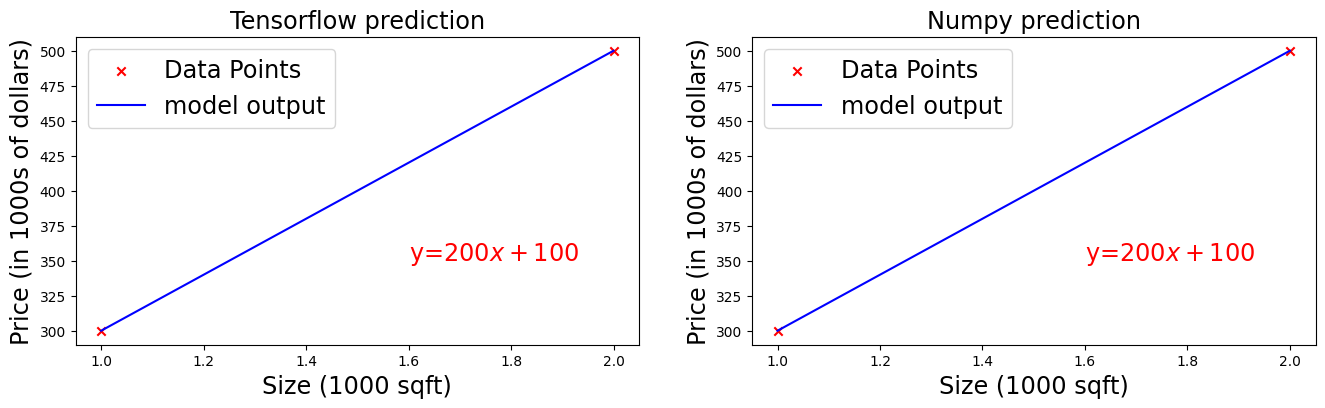

In [ ]:
plt_linear(X_train, Y_train, prediction_tf, prediction_np)

## Neuron with Sigmoid activation
The function implemented by a neuron/unit with a sigmoid activation is logistic  regression:
$$ f_{\mathbf{w},b}(x^{(i)}) = g(\mathbf{w}x^{(i)} + b) \tag{2}$$
where $$g(x) = sigmoid(x)$$

Let's set $w$ and $b$ to some known values and check the model.

In [ ]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

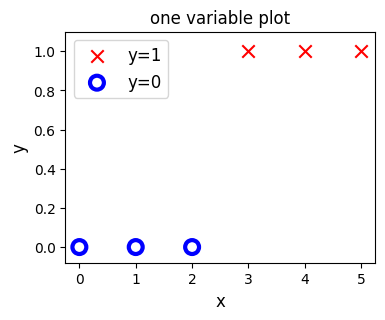

In [ ]:
pos = Y_train == 1
neg = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none',
              edgecolors='blue',lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

### Logistic Neuron
We can implement a 'logistic neuron' by adding a sigmoid activation.

In [ ]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


`model.summary()` shows the layers and number of parameters in the model. There is only one layer in this model and that layer has only one unit. The unit has two parameters, $w$ and $b$.

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[-1.5181717]] [0.]
(1, 1) (1,)


In [ ]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [ ]:
def sigmoidnp(z):

    z = np.clip( z, -500, 500 )
    g = 1.0/(1.0+np.exp(-z))
    return g

In [ ]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)

alog = sigmoidnp(np.dot(set_w, X_train[0].reshape(1,1)) + set_b)
print(alog)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
[[0.01098694]]
[[0.01098694]]


In [ ]:
import matplotlib.colors as colors
from matplotlib import cm

def plt_prob_1d(ax,fwb):
    """ plots a decision boundary but include shading to indicate the probability """
    #setup useful ranges and common linspaces
    x_space  = np.linspace(0, 5 , 50)
    y_space  = np.linspace(0, 1 , 50)

    # get probability for x range, extend to y
    z = np.zeros((len(x_space),len(y_space)))
    for i in range(len(x_space)):
        x = np.array([[x_space[i]]])
        z[:,i] = fwb(x)

    cmap = plt.get_cmap('Blues')
    new_cmap = truncate_colormap(cmap, 0.0, 0.5)
    pcm = ax.pcolormesh(x_space, y_space, z,
                   norm=cm.colors.Normalize(vmin=0, vmax=1),
                   cmap=new_cmap, shading='nearest', alpha = 0.9)
    ax.figure.colorbar(pcm, ax=ax)

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    """ truncates color map """
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


In [ ]:
def plt_logistic(X_train, Y_train, model, set_w, set_b, pos, neg):
    fig,ax = plt.subplots(1,2,figsize=(16,4))

    layerf= lambda x : model.predict(x)
    plt_prob_1d(ax[0], layerf)

    ax[0].scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
    ax[0].scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none',
                  edgecolors= 'blue',lw=3)

    ax[0].set_ylim(-0.08,1.1)
    ax[0].set_xlim(-0.5,5.5)
    ax[0].set_ylabel('y', fontsize=16)
    ax[0].set_xlabel('x', fontsize=16)
    ax[0].set_title('Tensorflow Model', fontsize=20)
    ax[0].legend(fontsize=16)

    layerf= lambda x : sigmoidnp(np.dot(set_w,x.reshape(1,1)) + set_b)
    plt_prob_1d(ax[1], layerf)

    ax[1].scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
    ax[1].scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none',
                  edgecolors='blue',lw=3)

    ax[1].set_ylim(-0.08,1.1)
    ax[1].set_xlim(-0.5,5.5)
    ax[1].set_ylabel('y', fontsize=16)
    ax[1].set_xlabel('x', fontsize=16)
    ax[1].set_title('Numpy Model', fontsize=20)
    ax[1].legend(fontsize=16)
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

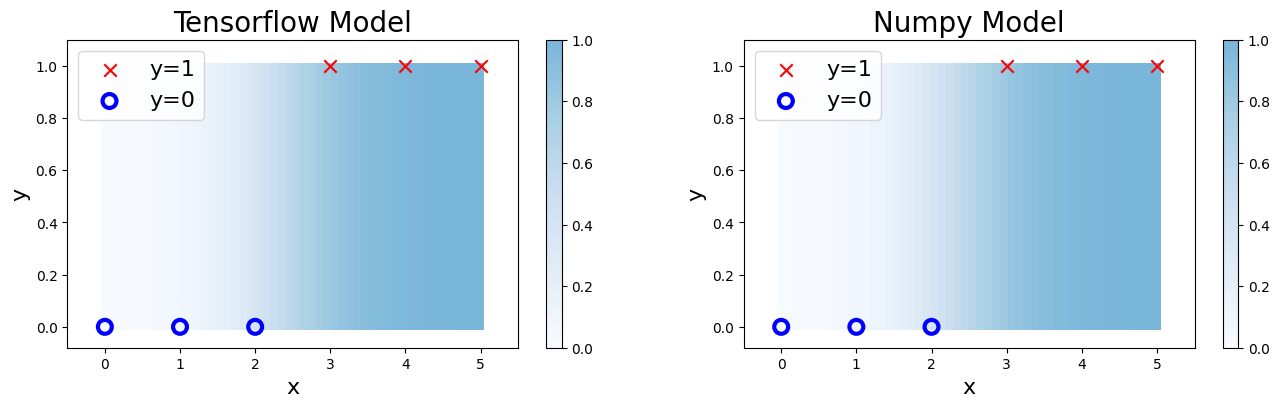

In [ ]:
plt_logistic(X_train, Y_train, model, set_w, set_b, pos, neg)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


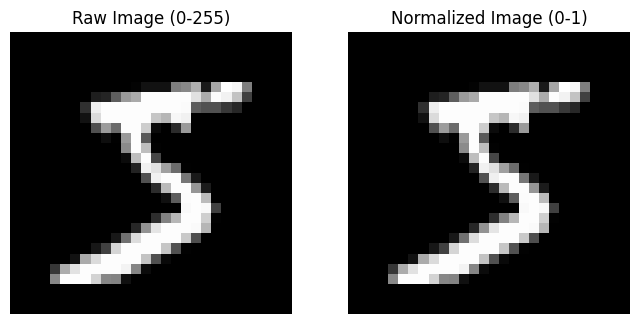

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset (grayscale images)
(x_train, _), _ = mnist.load_data()

# Select one image
raw_image = x_train[0]

# Normalize the image by scaling pixel values from 0-255 to 0-1
normalized_image = raw_image.astype("float32") / 255.0

# Create plot with two subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot raw image
axs[0].imshow(raw_image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("Raw Image (0-255)")
axs[0].axis('off')

# Plot normalized image
axs[1].imshow(normalized_image, cmap='gray', vmin=0, vmax=1)
axs[1].set_title("Normalized Image (0-1)")
axs[1].axis('off')

plt.show()
